# Data Science Project: Planning Stage (Individual)

Olivia Liang

[github link](https://github.com/lsqolivia/THE-FINAL-dsci-project.git)

## load package and importing data

In [1]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=1CrHpOItZ_dz1WRDVQdmhn_aSymEQrSBy'
players <- read_csv(url)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)
players |> 
  summarize(max_played = max(played_hours, na.rm = TRUE),
            min_played = min(played_hours, na.rm = TRUE),
            max_age = max(Age, na.rm = TRUE),
             min_age = min(Age, na.rm = TRUE))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


max_played,min_played,max_age,min_age
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,58,9


## Data Description

The dataset contains **196 observations** and **9 variables**. The key variables are:

+ `experience`: character that indicates the player’s experience level, categorized as `Pro`, `Veteran`, `Amateur`, `Regular`, or `Beginner`.  
+ `subscribe`: logical that shows whether the player subscribed to game updates (`TRUE` or `FALSE`).  
+ `hashedEmail`: character that stores the hashed email ID of each player.  
+ `played_hours`: numeric that records total playtime in hours, ranging from 0 to 99.

### potential issues

In [3]:
players |> group_by(gender) |> summarize(count=n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


1. The hashedEmail column is not interpretable and can be ignored.

2. experience is categorical; it must be converted into numeric form for modelling.

3. Minor gender categories (Agender, Other, Two-Spirited) have very small counts and could be merged with “Other.”

## Data visualization

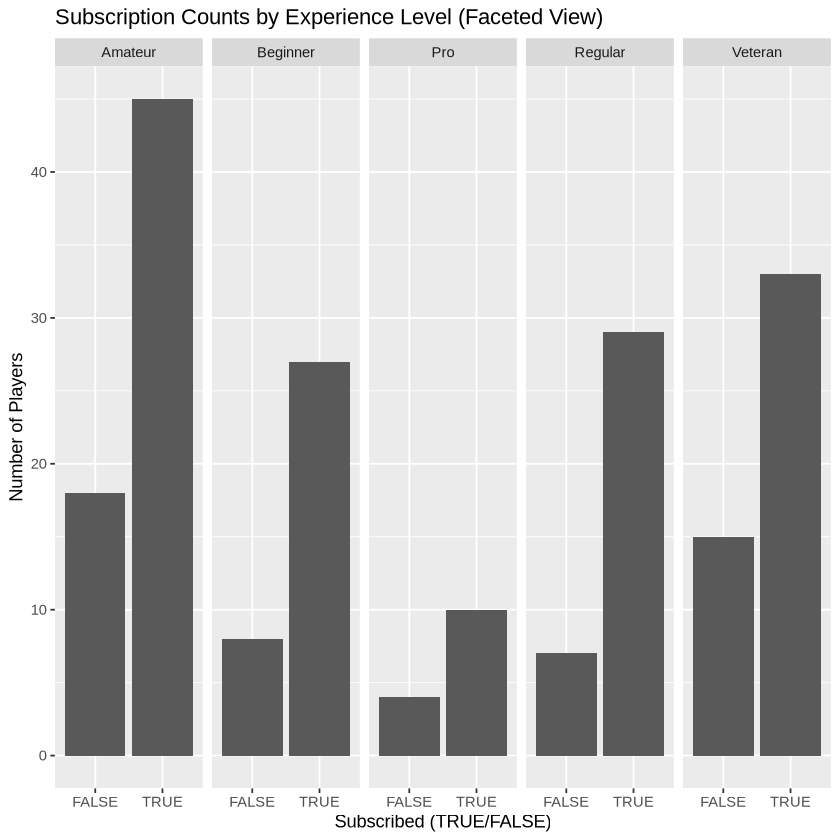

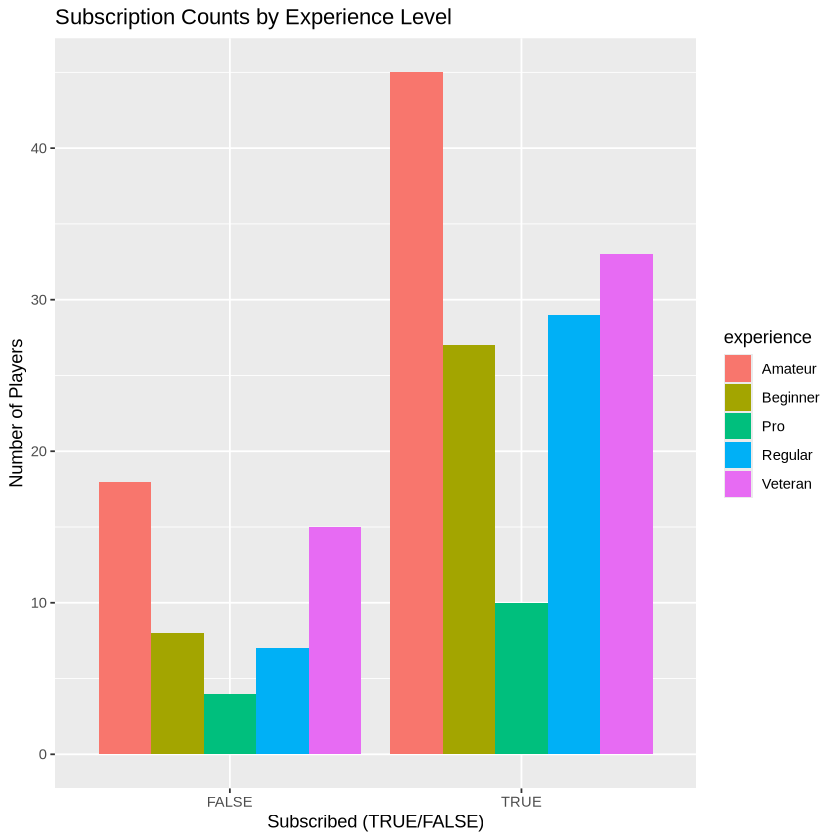

In [4]:
ggplot(players, aes(x=subscribe)) + geom_bar() +
facet_grid(cols = vars(experience)) +
labs(title = "Subscription Counts by Experience Level (Faceted View)",
     x = "Subscribed (TRUE/FALSE)",
     y = "Number of Players")

ggplot(players, aes(x=subscribe)) +
geom_bar(aes(fill=experience), position="dodge") +
labs(title = "Subscription Counts by Experience Level",
     x = "Subscribed (TRUE/FALSE)",
     y = "Number of Players")

**Insight:**
Across all experience levels, subscribers outnumber non-subscribers.
Veteran and Amateur players show the highest subscription counts.
This suggests experience is an important predictor of subscription behaviour.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


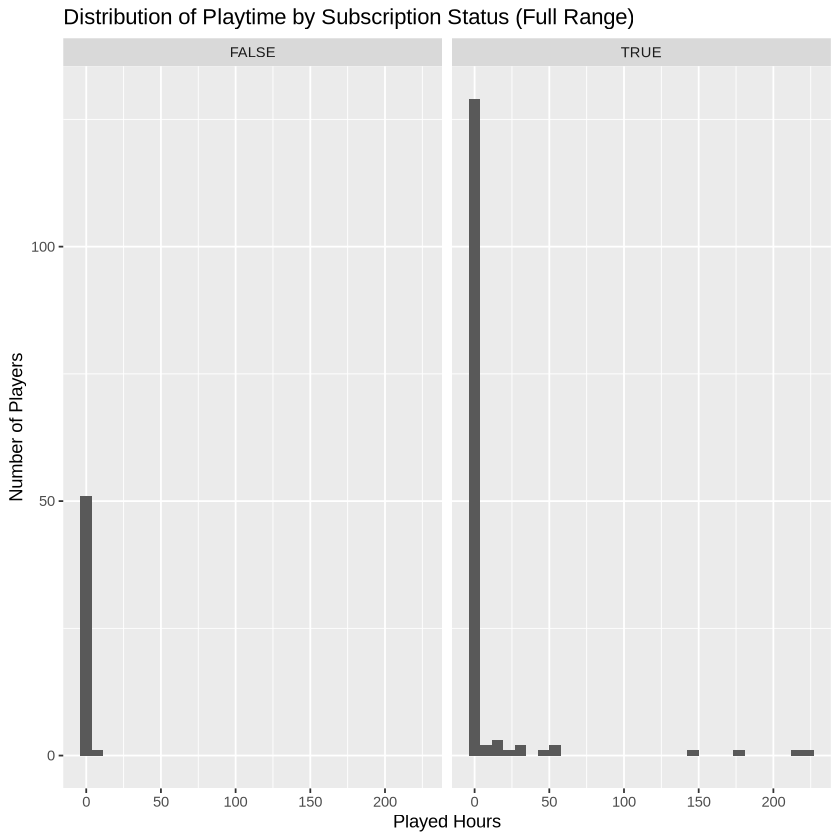

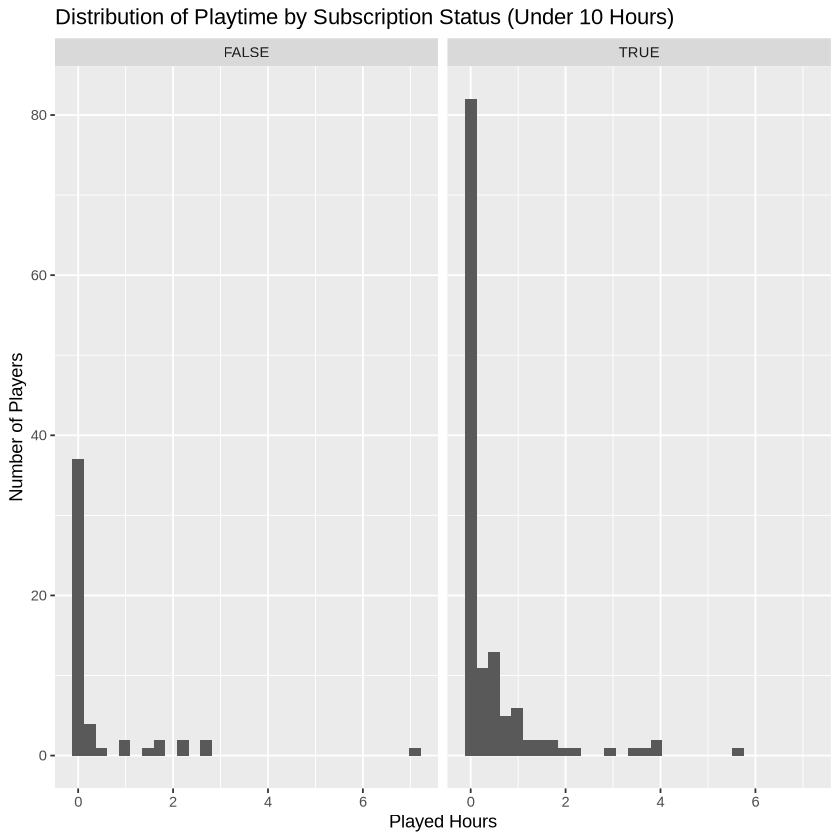

In [5]:
ggplot(players, aes(x=played_hours)) +
geom_histogram() + 
facet_grid(cols = vars(subscribe)) +
labs(title = "Distribution of Playtime by Subscription Status (Full Range)",
     x = "Played Hours",
     y = "Number of Players")

players |> filter(played_hours <= 10) |>
ggplot(aes(x=played_hours)) + geom_histogram() +
facet_grid(cols = vars(subscribe)) +
labs(title = "Distribution of Playtime by Subscription Status (Under 10 Hours)",
     x = "Played Hours",
     y = "Number of Players")

**Insight:**
Subscribers generally have shorter playtime than non-subscribers.
Within 10 hours or less, subscribers form most of this group, while non-subscribers span higher playtimes.
Casual players are more likely to subscribe, making played_hours a key predictor.

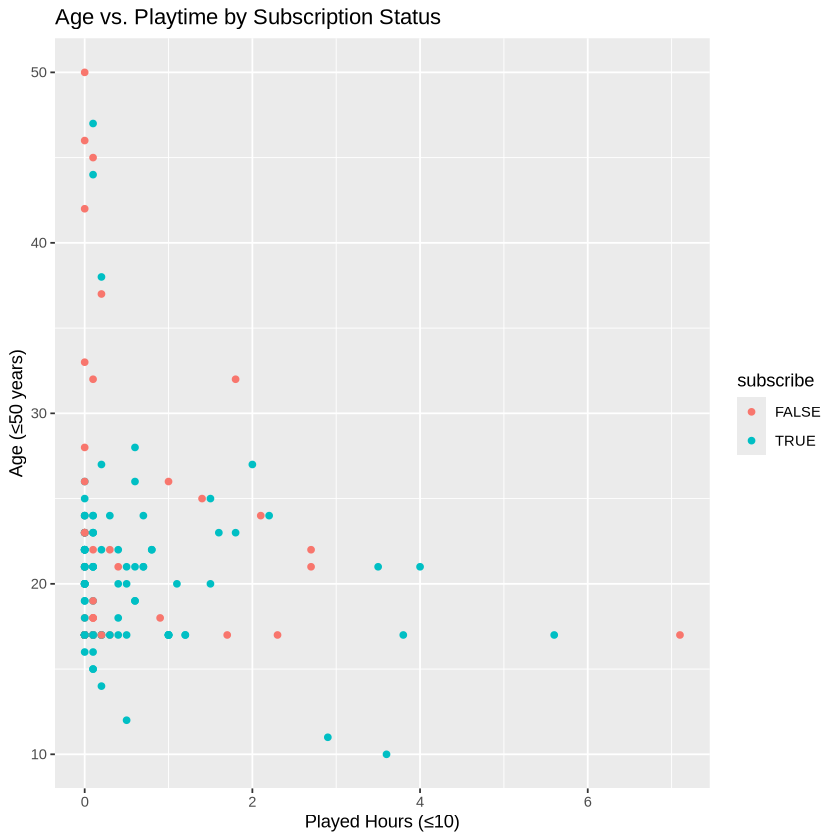

In [6]:
players |>  filter(played_hours <= 10, Age <= 50) |>
ggplot(aes(x=played_hours, y=Age)) + geom_point(aes(color=subscribe)) +
labs(title = "Age vs. Playtime by Subscription Status",
     x = "Played Hours (≤10)",
     y = "Age (≤50 years)")

**Insight:** 
A cluster of players around age 20 with 0–1 hours of playtime have subscribed.
Many subscribers are younger, casual players who spend little time in the game.
Thus, Age and played_hours can both help predict subscription.

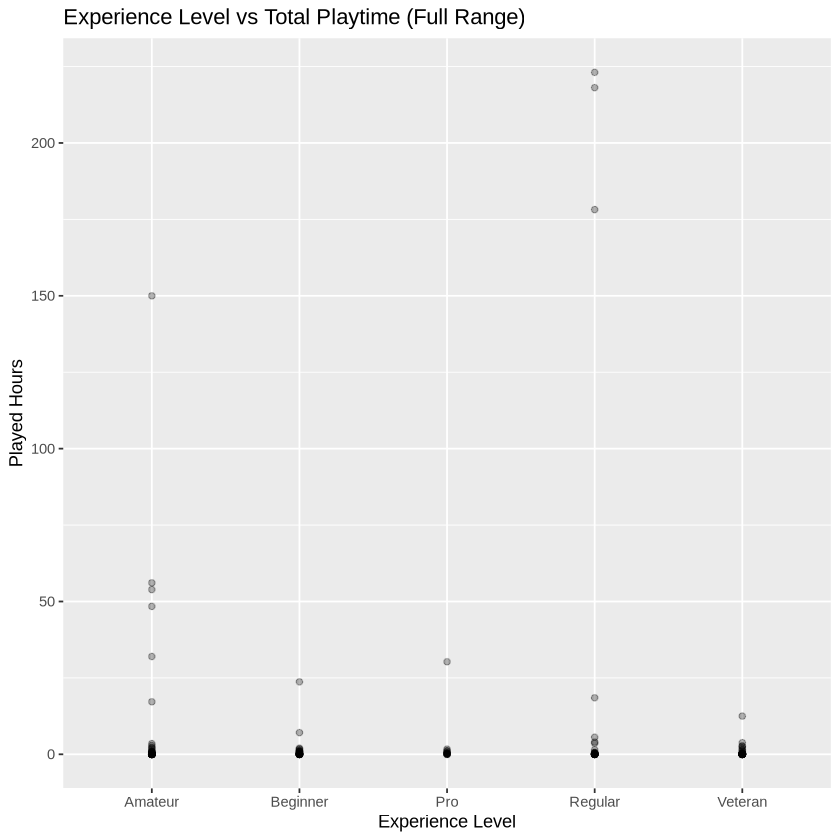

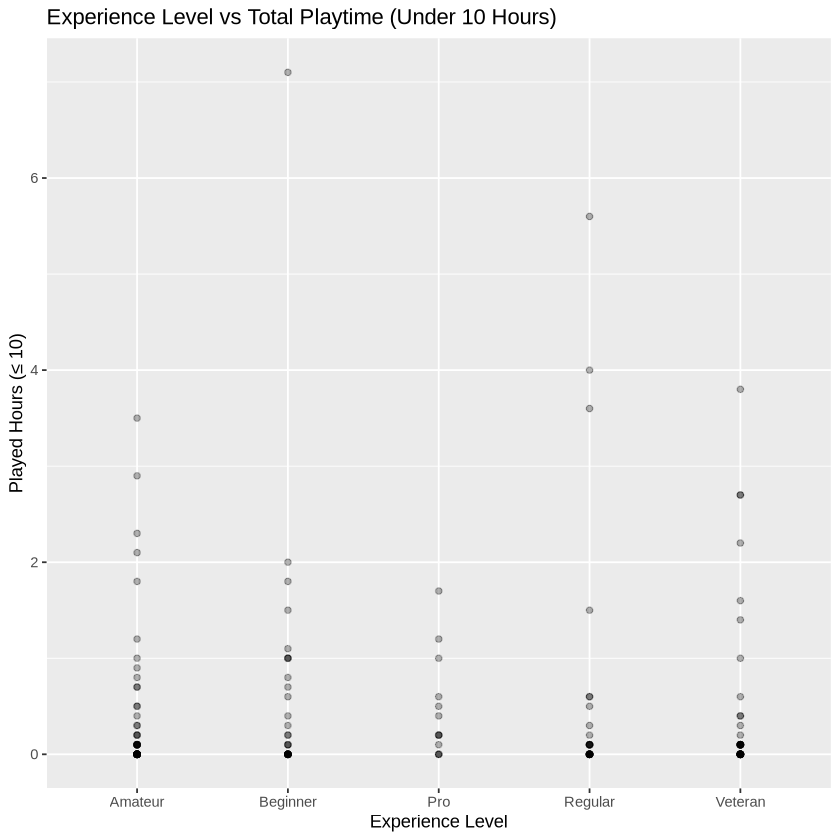

In [7]:
ggplot(players, aes(x=experience, y=played_hours)) +
geom_point(alpha=0.3) +
labs(title = "Experience Level vs Total Playtime (Full Range)",
     x = "Experience Level",
     y = "Played Hours")

players |> filter(played_hours <= 10) |>
ggplot(aes(x=experience, y=played_hours)) + 
geom_point(alpha=0.3) +
labs(title = "Experience Level vs Total Playtime (Under 10 Hours)",
     x = "Experience Level",
     y = "Played Hours (≤ 10)")

**Insight:**
A few Amateur and Regular players have very long playtimes (150–200h), making them outliers.
After limiting playtime to 10h or less, Beginner and Regular players dominate.
This shows clear variation across experience levels, so experience and 

In [8]:
players |> group_by(gender) |>
summarize(max = max(played_hours), min = min(played_hours), avg = mean(played_hours))

gender,max,min,avg
<chr>,<dbl>,<dbl>,<dbl>
Agender,12.5,0.0,6.25000000
Female,178.2,0.0,10.63513514
Male,223.1,0.0,4.12741935
Non-binary,218.1,0.0,14.88000000
Other,0.2,0.2,0.20000000
Prefer not to say,2.0,0.0,0.37272727
Two-Spirited,0.4,0.0,0.08333333


## Selected Question

I will answer **Question 1:**  
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In particular, I will use **experience**, **played_hours**, and **Age** as predictors to predict **subscribe**.  
This is a **KNN classification** problem since the response variable `subscribe` is categorical.  
Before performing classification, I will need to convert `experience` into a numeric format.

There are two ways to process the `experience` variable, and each has its own limitations:

1. **One-hot encoding:**  
   - Converts `experience` into five new columns: Pro, Veteran, Amateur, Regular, and Beginner, each coded as 0 or 1.  
   - **Limitation:** inflates feature count and may reduce KNN distance interpretability.

2. **Ordinal encoding:**  
   - Keeps `experience` as one column and assigns numeric values based on level:  
     `Pro = 5`, `Veteran = 4`, `Amateur = 3`, `Regular = 2`, `Beginner = 1`.  
   - **Limitation:** assumes equal spacing between levels that may not exist.

I will split the data into **75% training** and **25% testing** sets using set.seed(123) for reproducibility.
**Cross-validation** will be used to **tune** and select the best value of k for the KNN model.
After selecting the optimal k, I will train the model on the training data and evaluate its performance on the test set to measure how accurately it predicts subscription status. Further improvements could include testing other predictors, handling outliers, or alternative encoding.